In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Time-Wasters on Social Media.csv", sep=',')
df.head()

Saving Time-Wasters on Social Media.csv to Time-Wasters on Social Media.csv


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [3]:
#Choose a column with possible outliers
col = "Income"

#Calculate IQR (Interquartile Range)
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier range for {col}: below {lower_bound} or above {upper_bound}")

# Filter out outliers
df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(f"Removed {len(df) - len(df_no_outliers)} outliers from {col}")


Outlier range for Income: below -23000.25 or above 141467.75
Removed 0 outliers from Income


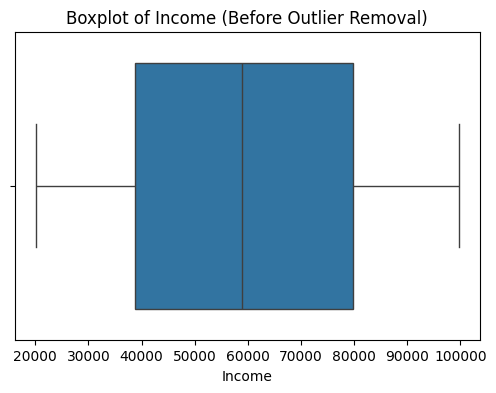

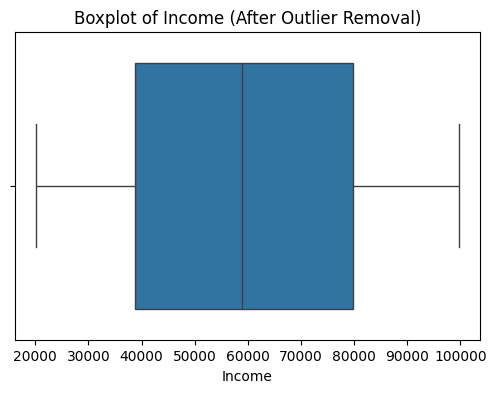

In [4]:
# Boxplot before outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col} (Before Outlier Removal)")
plt.show()

# Boxplot after outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df_no_outliers[col])
plt.title(f"Boxplot of {col} (After Outlier Removal)")
plt.show()

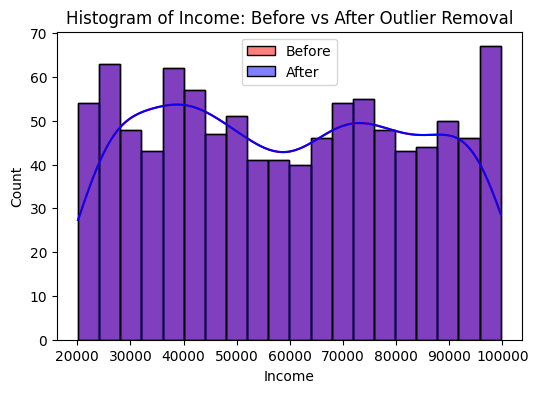

In [5]:
#Histogram comparison
plt.figure(figsize=(6,4))
sns.histplot(df[col], bins=20, kde=True, color="red", label="Before")
sns.histplot(df_no_outliers[col], bins=20, kde=True, color="blue", label="After")
plt.title(f"Histogram of {col}: Before vs After Outlier Removal")
plt.legend()
plt.show()